In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
df=pd.read_csv("cluster_data.csv")

In [4]:
df

,Feature 1,Feature 2
0,2.698582,-0.672960
1,-0.128113,4.355952
2,2.509049,5.773146
3,-1.518276,3.444886
4,-0.072283,2.883769
...,...,...
495,10.303693,-4.378493
496,-0.730000,6.254563
497,-3.478708,2.257991
498,-2.081214,2.447245


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  500 non-null    float64
 1   Feature 2  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
x=df.select_dtypes(include=np.number)

In [9]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

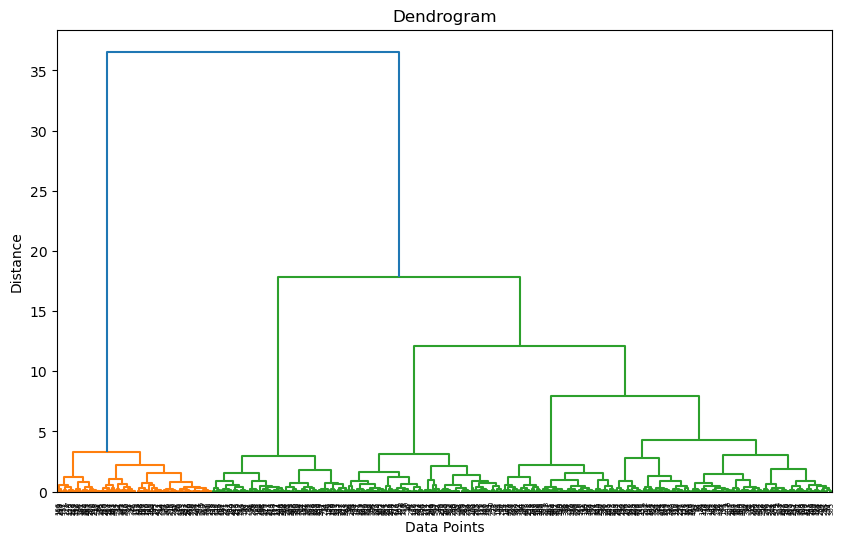

In [11]:
linked = linkage(x_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [13]:
hc = AgglomerativeClustering(
    n_clusters=2,      # choose based on dendrogram
    metric='euclidean',
    linkage='ward'
)

labels = hc.fit_predict(x_scaled)

# Add cluster labels
df["Cluster"] = labels
print(df.head())


   Feature 1  Feature 2  Cluster
0   2.698582  -0.672960        0
1  -0.128113   4.355952        0
2   2.509049   5.773146        0
3  -1.518276   3.444886        0
4  -0.072283   2.883769        0


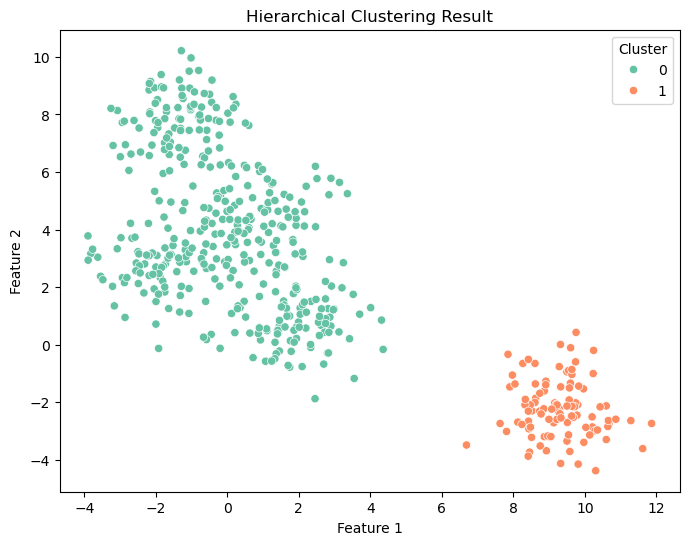

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=x.iloc[:, 0],
    y=x.iloc[:, 1],
    hue=df["Cluster"],
    palette="Set2"
)
plt.title("Hierarchical Clustering Result")
plt.show()